<a href="https://colab.research.google.com/github/albertchen1375/FredHutch-Samples/blob/main/CSM148_PS1_PredictingHappiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Happiness**

In this problem set you will work with a data set from the [World Happiness Website](https://worldhappiness.report/ed/2018/).

You will use the data in the file,  WHR2018Chapter2OnlineData.xls.

Our goal will be to develop a model for happiness.


#[DSLC Stage 1]: Domain Problem and Data Collection

Read the description of the data at the World Happiness Website.

**TODO: Add a text cell to answer the following questions:**

1. From your new domain knowledge, what variable will you use as a response or dependent variable for your model of happiness?
2. From your new domain knowledge, what variables will you consider as potential predictor (or independent) variables?
3. From your new domain knowledge, can you identify any variables that are cofounders?
4. Please share one question that you still have about the data collection process.


1. The Dependent variable for my model of happiness will be "Life Ladder".
2. Potential predictors include income, healthy life expectancy, social support, freedom, trust and generosity.
3. I would say that there are some potential confounding variables. For example, I would say that freedom to make life choices would be a confounding variable as it would effect happiness and democratic quality as well. Higher GDP can also be a confounding variable because I believe it influences many of the other independent variables we will be looking at in our model.
4. One question I have about the data collection process is how it accounts for difference in cultures that are more willing to say that they are not happy or happy. More willing to express sadness or happiness.

# [DSLC stage 2]: Data cleaning, pre-processing, and exploratory data analysis


In this section you will load and clean the data. Please run the code provide and complete modifications as specified.


In [1]:
# Installing scikit-lego package
%pip install scikit-lego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression



pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the happiness data in file WHR2018Chapter2OnlineData.xls
# Upload this file using the folder to left
happiness_orig = pd.read_excel("/content/drive/MyDrive/WHR2018Chapter2OnlineData.xls", sheet_name=0)
happiness_orig

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918,NaN,0.432,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899,NaN,0.432,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776,NaN,0.432,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,-0.863044,-1.371214,2.776363,0.743257,NaN,0.432,0.596690


In [5]:
# Examine the first 10 rows
happiness_orig.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [6]:
#TODO Add code to examine a random sample of 10 rows
happiness_10 = happiness_orig.sample(n=10)
happiness_10

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
1066,Palestinian Territories,2016,4.906618,8.461804,0.817771,62.954998,0.607669,-0.134392,0.812465,0.592769,0.377642,0.463772,NaN,NaN,2.375509,0.484144,NaN,NaN,0.420558
197,Bulgaria,2017,5.096902,9.822962,0.941755,66.415489,0.689047,-0.160039,0.910800,0.614217,0.188637,0.326088,NaN,NaN,1.852364,0.363429,NaN,0.354667,0.343220
542,Haiti,2008,3.846329,7.370657,0.679098,50.663544,0.464971,0.262831,0.811659,0.607697,0.255774,0.236633,-0.986054,-1.135312,1.868774,0.485859,NaN,0.409000,NaN
592,India,2009,4.521518,8.306424,0.652852,57.198784,0.678644,-0.034849,0.894611,0.771343,0.300621,0.698452,-0.446561,-0.194335,1.965485,0.434696,NaN,0.352000,0.626251
1500,Uzbekistan,2012,6.019332,8.469234,0.933141,62.381805,0.913550,-0.039762,0.463375,0.785679,0.118177,NaN,-1.276144,-1.270597,2.020274,0.335631,NaN,0.348000,0.327622
849,Malawi,2015,3.867638,6.992741,0.494382,53.002853,0.801391,0.054795,0.834825,0.632621,0.259764,0.568602,0.013314,-0.640059,2.544559,0.657910,NaN,0.430000,0.658998
205,Burkina Faso,2014,3.481348,7.366656,0.742262,51.185596,0.709965,0.008611,0.800758,0.613732,0.255644,0.543086,-0.569490,-0.474964,2.151572,0.618028,0.353,0.394667,0.692569
1320,Sweden,2014,7.239148,10.695747,0.932720,72.222725,0.945273,0.188916,0.250390,0.835672,0.207688,0.563272,1.338252,1.940165,1.566649,0.216413,0.272,0.267455,0.382446
803,Lithuania,2007,5.808285,10.031343,0.940792,62.277027,0.589662,-0.290040,0.966326,0.589249,0.279184,0.269293,0.851915,0.660688,1.951880,0.336051,0.346,0.353091,NaN
113,Belarus,2011,5.225308,9.750727,0.909888,62.714363,0.656011,-0.179470,0.671939,0.520890,0.249455,NaN,-0.873989,-1.010502,1.977775,0.378499,0.271,0.281875,0.285032


Edit this cell to answer the following question:
5. Please share one question that you still have about the data itself

Why are some of the values NaN, are some of these Nan because they are influenced by another factor that could for example restrict freedom?

6. What is the observational unit in the data?

The observational unit in the table is life ladder, a measure of happiness defined by the people giving the survey.

In [7]:
#TODO: Examine missingness
# 1. Calculate the percent of missingness of each variable in the data
# 2. Visualize the percent of missingness of each variable in a heatmap

percent_missingness = happiness_orig.isnull().mean() * 100

print(percent_missingness)

# 2. Visualize the percent of missingness using a heatmap
px.imshow(happiness_orig.isna().astype(int), color_continuous_scale='Greys')

country                                                      0.000000
year                                                         0.000000
Life Ladder                                                  0.000000
Log GDP per capita                                           1.728553
Social support                                               0.832266
Healthy life expectancy at birth                             0.576184
Freedom to make life choices                                 1.856594
Generosity                                                   5.121639
Perceptions of corruption                                    5.761844
Positive affect                                              1.152369
Negative affect                                              0.768246
Confidence in national government                           10.307298
Democratic Quality                                          10.947503
Delivery Quality                                            10.947503
Standard deviation o

In [8]:
# This is a data cleaning function that is provided for you.
# Please feel free to modify this based on decisions you make
# during the pre-processing step. Document any changes you make and why.
def clean_happiness(happiness_orig, predictor_variable = None):
  # rename column names
  happiness_clean = happiness_orig.rename(columns={
    "Life Ladder": "happiness",
    "Log GDP per capita": "log_gdp_per_capita",
    "Social support": "social_support",
    "Healthy life expectancy at birth": "life_expectancy",
    "Freedom to make life choices": "freedom_choices",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption",
    "Positive affect": "positive_affect",
    "Negative affect": "negative_affect",
    "Confidence in national government": "government_confidence",
    "gini of household income reported in Gallup, by wp5-year": "gini_index"})
  # filter to relevant columns
  happiness_clean = happiness_clean[["country", "year", "happiness", "log_gdp_per_capita",
                                     "social_support", "life_expectancy",
                                     "freedom_choices", "generosity",
                                     "corruption", "positive_affect",
                                     "negative_affect", "government_confidence",
                                     "gini_index"]]

  if (predictor_variable is not None):
    happiness_clean = happiness_clean[["country", "year", "happiness", predictor_variable]]

  return(happiness_clean)


In [9]:
# Cleaning the data
happiness_clean = clean_happiness(happiness_orig)
#DROP ROWS WHERE NAN VALUE IN HAPPINESS AND SOCIAL SUPPORT (LOOKING AT SOCIAL SUPPORT FOR PREDICTOR VARIABLE)
happiness_clean = happiness_clean.dropna(subset=['happiness', 'social_support'])
happiness_clean

,country,year,happiness,log_gdp_per_capita,social_support,life_expectancy,freedom_choices,generosity,corruption,positive_affect,negative_affect,government_confidence,gini_index
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,0.344540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,Zimbabwe,2013,4.690188,7.565154,0.799274,48.949745,0.575884,-0.076716,0.830937,0.711885,0.182288,0.527755,0.555439
1558,Zimbabwe,2014,4.184451,7.562753,0.765839,50.051235,0.642034,-0.045885,0.820217,0.725214,0.239111,0.566209,0.601080
1559,Zimbabwe,2015,3.703191,7.556052,0.735800,50.925652,0.667193,-0.094585,0.810457,0.715079,0.178861,0.590012,0.655137
1560,Zimbabwe,2016,3.735400,7.538829,0.768425,51.800068,0.732971,-0.065283,0.723612,0.737636,0.208555,0.699344,0.596690


Edit this cell to answer the following question:
7. What variables were dropped from the original data set?  Would you drop any additional variables from this data set and why?

Democratic quality, delivery quality, standard deviation by ladder country - year, Standard deviation/Mean of ladder by country-year, GINI index (World Bank estimate), and GINI index (World Bank estimate), average 2000-15 were removed from the dataset. I would drop government confidence as it seems that it has a lot of NaN values in the column.

8. How would you impute the gini_index variable? Explain why. (You do not have to write code to do this unless you need to do so for your model. In this case, include an imputation function and call it from the data cleaning function)

For me, I would impute by taking the median of the country. This is because I believe that the gini_index variable is related to its country and also its gdp and socioeconomic situation. Therefore, I believe taking the median of the country would preserve the relationship compared to just taking the median of the entire dataset.

Now we will visualize the relationships between variables.

# Plot Guidelines
For all plots and visualizations for this assignment please include


*   Captions: Descriptive captions summarizing the plot's insights.
*   Legends: Clear legends identifying each element in the plot.
*   Axis Labels: Informative labels for both the x and y axes, including units if applicable.
* Style: appropriate colors, font sizes, and plot layouts for better readability and presentation.

*It is important that your visualizations are easy-to-understand plots.*

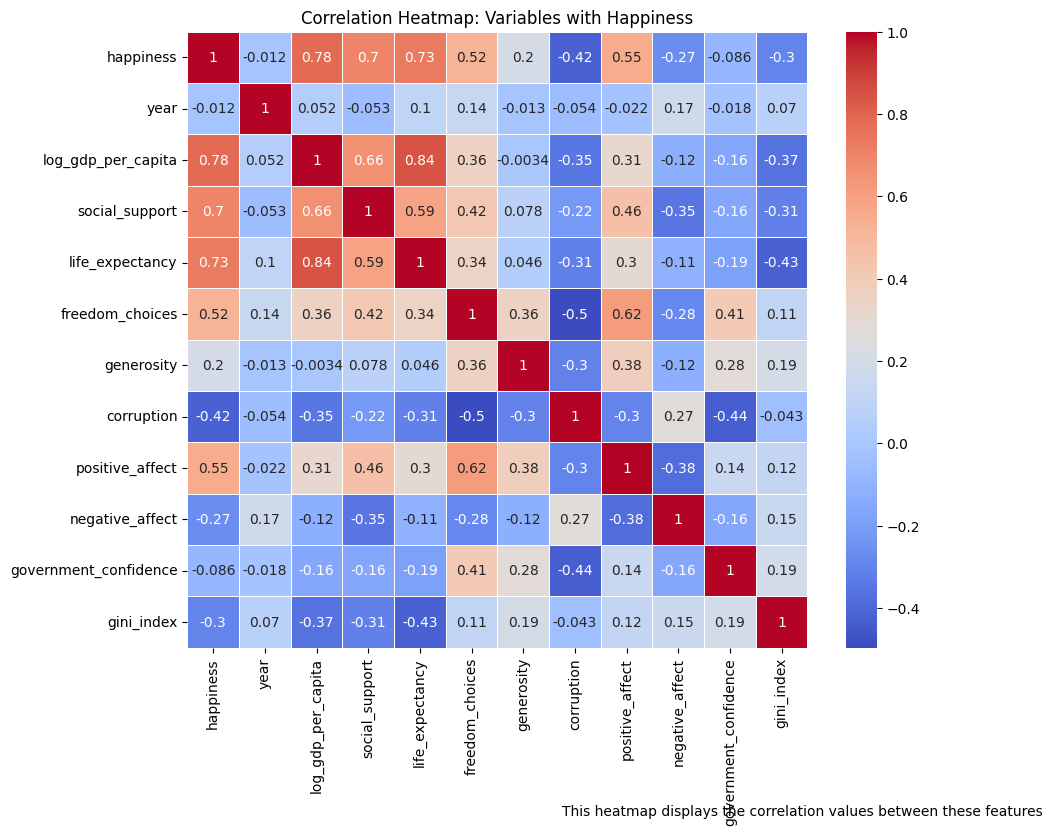

In [10]:
# Since we are predicting happiness, we need to figure out what variable to use
# as a predictor.
# TODO: Find and justify choice of predictor variable
# 1. Calculate the correlation between the happiness variable
#   and your set of remaining potential predictor variables
# 2. Visualize the correlations between the dependent variable
# Calculate the correlation matrix
numeric_cols = happiness_clean.select_dtypes(include='number')

correlation = numeric_cols.corr()["happiness"].drop(["happiness"])

correlation
# Visualize the correlations
# Plotting the correlation values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
correlation_matrix = happiness_clean[['happiness', 'year', 'log_gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_choices', 'generosity', 'corruption', 'positive_affect', 'negative_affect', 'government_confidence', 'gini_index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Variables with Happiness')
plt.figtext(0.5, -0.1, "This heatmap displays the correlation values between these features")
plt.show()

Edit this cell to answer the following question:
9. From this investigation, what variable do you choose as your predictor and why?

I will choose social support as my predictor variable. Initially, I chose log gdp per capita but it is highly correlated with life expectancy. I believe this could be a cofounding variable that I would not want to investigate. Social support is also somewhat correlated with log gdp per capita but not as strongly as life expectancy is. Therefore, I would want to investigate social support as my predictor.

**Separate data into training and validation sets**

During this stage it is important that we choose data sets for training predictive models and validating predictive models.

In [11]:
# TODO: Write code here to separate your data into a training and validation set
# (You do not need to worry about a test set right now)
# Explain your decision to separate the data this way.
# You will reuse these data subsets in the following DSLC stage.

from sklearn.model_selection import train_test_split
X = happiness_clean['social_support']
y = happiness_clean['happiness']

# Splitting the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# [DSLC stage 4]: Predictive analysis

In this section we will examine the relationship between happiness as the response variable and your predictor variable. First we will visualize the relationship between happiness and the predictor variable.

In [12]:
#TODO: For your training and validation data sets
# 1. Create data frames that only contain columns for
# country, year, happiness, and your predictor variable
# 2. Create a scatterplot of happiness vs your predictor variable

happiness_df = clean_happiness(happiness_orig, predictor_variable = 'social_support')


px.scatter(happiness_df, x='social_support', y='happiness')

# Modeling the relationship
**Using your training data set**

Train the LAD (L1 loss) and LS (L2 loss) linear fits for predicting happiness  based on your chosen predictor variable of your choosing.

*Once you have completed this, edit this cell here to report the formulas for your fitted models.*

*TODO: add model formulas here*

For the LAD model you will use  LADRegression from sklego.linear_model. Examples are available in the L04 notebook and [API documentation](https://koaning.github.io/scikit-lego/user-guide/linear-models/#least-absolute-deviation-regression)

In [13]:
# TODO: Add code here to
# 1. Train LAD model on your training Set
# 2. Get the parameters of your model to write formula
# 3. Train LS model on your training Set
# 4. Get the parameters of your model to write formula
# 5. Create a scatterplot of happiness vs your predictor variable
#    with a line for each model
lad_fit = LADRegression()
lad_fit.fit(np.array(X_train).reshape(-1, 1), y_train)
print(lad_fit.intercept_, lad_fit.coef_[0])


0.3188782580535379 6.297041889279165


For the LS model you will use  LinearRegression from sklearn.linear_model. Examples are available in the L04 notebook and [API documentation](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html)

In [14]:
# TODO: Add code here to
# 3. Train LS model on your training Set
# 4. Get the parameters of your model to write formula
# 5. Create a scatterplot of happiness vs your predictor variable
#    with a line for each model
ls_fit = LinearRegression()
ls_fit.fit(np.array(X_train).reshape(-1, 1), y_train)
print(ls_fit.intercept_, ls_fit.coef_[0])

0.1768420061023459 6.4661076950372625


In [15]:
# TODO: Add code here to
# 5. Create a scatterplot of happiness vs your predictor variable
#    with a line for each model
fig = px.scatter(happiness_df, x='social_support', y='happiness', title='Relationship Between Happiness and Social Support with LAD and LS Regression Models')

# Add LAD model line
fig.add_trace(
    go.Scatter(x=happiness_df['social_support'],
               y=lad_fit.intercept_ + happiness_df['social_support'] * lad_fit.coef_[0],
               mode='lines',
               name='LAD Model',
               line=dict(color='red'))
)

# Add LS model line
fig.add_trace(
    go.Scatter(x=happiness_df['social_support'],
               y=ls_fit.intercept_ + happiness_df['social_support'] * ls_fit.coef_[0],
               mode='lines',
               name='LS Model',
               line=dict(color='green'))
)

fig.add_annotation(
    text="This plot shows the relationship between Happiness and Social Support, with regression lines fitted using LAD and LS models.",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Positioning it below the plot
    showarrow=False,
    font=dict(size=12)
)

# Show the plot
fig.show()


Now we'd like to evaluate how each model has done.

**Using your validation data set**

Compute the rMSE, MAE, MAD, correlation and  $R^2$  evaluations for each algorithm.

In [16]:
#TODO: Write code here to
# Create a  3 column dataframe that for each point in your validation set
# contains the actual observed happiness score, the happiness score predicted
# from LAD, and the happiness score predicted from LS

valid_df = pd.DataFrame({'true': y_val, 'lad_pred': lad_fit.predict(np.array(X_val).reshape(-1, 1)), 'ls_pred': ls_fit.predict(np.array(X_val).reshape(-1, 1))})
valid_df.sample(10)

,true,lad_pred,ls_pred
684,6.262794,6.091400,6.104347
678,5.889759,6.068265,6.080591
1184,6.294282,5.608937,5.608930
658,6.779774,5.858154,5.864838
501,4.197696,4.306151,4.271167
640,7.018379,6.412807,6.434383
71,6.950000,5.979418,5.989359
384,4.735021,5.734141,5.737496
1235,5.993163,6.270711,6.288472
757,4.905376,5.712827,5.715610


In [17]:
# TODO: Write code here to
# Create a scatterplot of the observed happiness score vs
# the happiness score predicted from LAD
# What would a perfect prediction look like?
# Calculate predicted happiness scores from the LAD model
lad_predicted = lad_fit.predict(np.array(X_val).reshape(-1, 1))


fig = px.scatter(x=y_val, y=lad_predicted,
                 labels={'x': 'Observed Happiness', 'y': 'Predicted Happiness (LAD)'},
                 title='Observed vs Predicted Happiness Scores (LAD Model)')


max_value = max(y_val.max(), lad_predicted.max())
fig.add_trace(go.Scatter(
    x=[0, max_value],
    y=[0, max_value],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='green', dash='dash')
))

# Show the plot
fig.show()


A perfect prediction would mean that the scatter dots would all be along the dotted line of the predicted happiness.

In [18]:
# TODO: Write code here to
# Create a scatterplot of the observed happiness score vs
# the happiness score predicted from LS
# What would a perfect prediction look like?
ls_predicted = ls_fit.predict(np.array(X_val).reshape(-1, 1))

fig = px.scatter(x=y_val, y=ls_predicted,
                 labels={'x': 'Observed Happiness', 'y': 'Predicted Happiness (LS)'},
                 title='Observed vs Predicted Happiness Scores (LS Model)')
max_value = max(y_val.max(), ls_predicted.max())
fig.add_trace(go.Scatter(
    x=[0, max_value],
    y=[0, max_value],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='orange', dash='dash')
))

# Show the plot
fig.show()


A perfect prediction would mean that the scatter dots would all be along the dotted line of the predicted happiness.

In [19]:
#TODO: Using the dataframe that you created
# Write code in this cell to calculate and print
# the rMSE, MAE, MAD, correlation, and R2 of
# the true price with the LS and LAD predictions
# Metrics for LS model
print('LS rMSE:', np.sqrt(mean_squared_error(valid_df['true'], valid_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(valid_df['true'], valid_df['ls_pred']))
print('LS MAD:', np.median(np.abs(valid_df['true'] - valid_df['ls_pred'])))
print('LS correlation:', np.corrcoef(valid_df['true'], valid_df['ls_pred'])[0, 1])
print('LS R2:', r2_score(valid_df['true'], valid_df['ls_pred']))

# Metrics for LAD model
print('LAD rMSE:', np.sqrt(mean_squared_error(valid_df['true'], valid_df['lad_pred'])))
print('LAD MAE:', mean_absolute_error(valid_df['true'], valid_df['lad_pred']))
print('LAD MAD:', np.median(np.abs(valid_df['true'] - valid_df['lad_pred'])))
print('LAD correlation:', np.corrcoef(valid_df['true'], valid_df['lad_pred'])[0, 1])
print('LAD R2:', r2_score(valid_df['true'], valid_df['lad_pred']))


LS rMSE: 0.837955689330087
LS MAE: 0.6945251053174244
LS MAD: 0.6008641615177095
LS correlation: 0.6971844292832614
LS R2: 0.48137711158185137
LAD rMSE: 0.8394688398346832
LAD MAE: 0.6963153673276301
LAD MAD: 0.6015969396591423
LAD correlation: 0.6971844292832614
LAD R2: 0.4795023990257097


**Evaluating the models**

Based on the scatterplots and evaluation metrics that you have calculated, what model is better for the relationship between happiness and your predictor variable? Please explain why with supporting evidence from your plots and calculations.

Based on the scatterplots and evaluation metrics that were calculated, L2 seems to be the better method. LS has lower values for rMSE, MAE, and MAD and lower values indicate a better model for the relationship between happiness and predictor. In addition, when lookig at the plots, you can slightly observe that the datapoints are closer to the line of the LS method, indicating the better performance. Therefore, I believe Linear regression here is the better method.

**Citation:**

This problem set is adapted from Ch. 9 exercise 22 from the following upcoming book:

Yu, B., & Barter, R. L. (2024). Veridical data science: The practice of responsible data analysis and decision making. The MIT Press.